<div style="border-radius:10px;
            border:#0b0265 solid;
           background-color:green;
           font-size:110%;
           letter-spacing:0.5px;
            text-align: center">

<center><h1 style="padding: 25px 0px; color:white; font-weight: bold; font-family: Times New Roman">
Random Forest Ensemble Technique</h1></center>    

</div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import category_encoders as ce
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("car_evaluation.csv",header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
df.columns=col_names
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [5]:
#to get the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
for i in col_names:
    print(df[i].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [7]:
#checking for the missing values in df
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [8]:
X=df.drop(["class"],axis=1)
y=df["class"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [10]:
#enoding the categorical variables
encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [11]:
X_train

,buying,maint,doors,persons,lug_boot,safety
840,1,1,1,1,1,1
650,1,2,2,1,2,2
231,2,2,2,2,3,1
176,2,3,3,2,1,2
886,3,4,2,3,1,3
...,...,...,...,...,...,...
1122,3,2,4,2,3,1
717,1,2,3,2,3,1
1590,4,2,3,3,3,1
1289,3,1,1,3,2,2


In [33]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print("Accuracy is:",acc)

Accuracy is: 0.9387040280210157


In [35]:
#Ranking features according to their ranks
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
#feture scores are
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

safety      0.283820
persons     0.271967
buying      0.180038
maint       0.162334
lug_boot    0.101841
dtype: float64

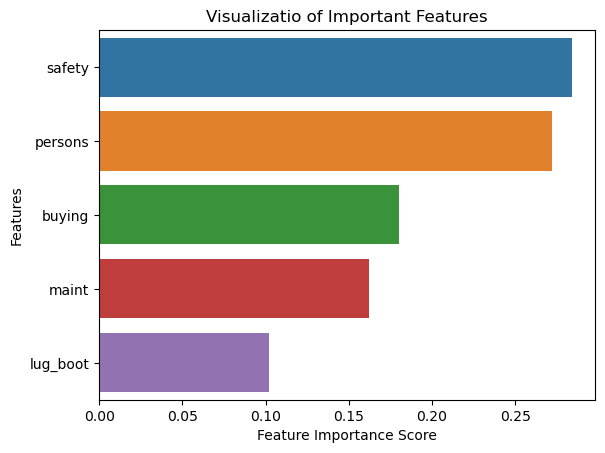

In [37]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizatio of Important Features")
plt.show()

In [38]:
#taking only important features now for the creation of the model
X = df.drop(['class','doors'],axis=1)
y = df['class']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [40]:
encoder = ce.OrdinalEncoder(cols=['buying','maint','persons','lug_boot','safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [41]:
#creation of the more improved model 
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred3=clf.predict(X_test)

In [42]:
acc3=accuracy_score(y_test,y_pred3)
print("Accuracy of the model is:",acc3)

Accuracy of the model is: 0.9422066549912435
